In [2]:
#importing necessary libraries
import numpy as np
np.random.seed(123)  # for reproducibility
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.datasets import mnist
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [3]:
# -*- coding: utf-8 -*-
"""
Created on Wed Mar  7 23:41:52 2018

@author: mallyaa
"""
#Importing data
import pickle
from keras.utils import to_categorical
training_file = 'traffic-signs-data/train.p'
validation_file='traffic-signs-data/valid.p'
testing_file =  'traffic-signs-data/test.p'
signnames_file = "traffic-signs-data/signnames.csv"
with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
with open(signnames_file) as f:
    f.readline() # Strip the header
    tuples = [line.strip().split(',') for line in f]
    sign_names = {int(t[0]): t[1] for t in tuples}
    
X_train, Y_train = train['features'], train['labels']
Y_train = to_categorical(Y_train)
X_val, Y_val = valid['features'], valid['labels']
Y_val = to_categorical(Y_val)
X_test, Y_test = test['features'], test['labels']
Y_test = to_categorical(Y_test)
print(Y_train[:5])
print(X_train.shape)

[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  1.  0.]]
(34799, 32, 32, 3)


In [4]:
#preprocessing final stage, feature-scaling
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.
print('RGB shape:', X_train.shape)
#feature scaling
X_train = X_train.astype('float32')/255
X_val = X_val.astype('float32')/255
X_test = X_test.astype('float32')/255

RGB shape: (34799, 32, 32, 3)


In [4]:
#Model setup
from keras import regularizers
model = Sequential()
model.add(Convolution2D(32, (3, 3), activation='relu', input_shape=(32,32,3), padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(32, (3, 3), activation='relu', input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(64, activation='relu', kernel_regularizer= regularizers.l2(0.01)))
# model.add(Dense(120, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(84, activation='relu'))
# model.add(Dropout(0.5))
model.add(Dense(43, activation='softmax'))


In [5]:
#model run
#model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [6]:
#gather history info
history = model.fit(X_train, Y_train, validation_data=(X_val,Y_val),batch_size=32, epochs=12, verbose=1)

# list all data in history
print(history.history.keys())

Train on 34799 samples, validate on 4410 samples
Epoch 1/12
34799/34799 [==============================] - 34s 967us/step - loss: 0.1017 - acc: 0.9781 - val_loss: 0.0852 - val_acc: 0.9773
Epoch 2/12
34799/34799 [==============================] - 34s 983us/step - loss: 0.0677 - acc: 0.9815 - val_loss: 0.0691 - val_acc: 0.9806
Epoch 3/12
34799/34799 [==============================] - 34s 975us/step - loss: 0.0595 - acc: 0.9836 - val_loss: 0.0622 - val_acc: 0.9832
Epoch 4/12
34799/34799 [==============================] - 34s 975us/step - loss: 0.0536 - acc: 0.9854 - val_loss: 0.0591 - val_acc: 0.9826
Epoch 5/12
34799/34799 [==============================] - 34s 977us/step - loss: 0.0487 - acc: 0.9871 - val_loss: 0.0518 - val_acc: 0.9859
Epoch 6/12
34799/34799 [==============================] - 34s 986us/step - loss: 0.0453 - acc: 0.9882 - val_loss: 0.0512 - val_acc: 0.9858
Epoch 7/12
34799/34799 [==============================] - 34s 985us/step - loss: 0.0427 - acc: 0.9893 - val_loss: 0.0

12
12


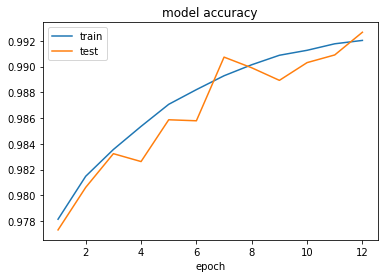

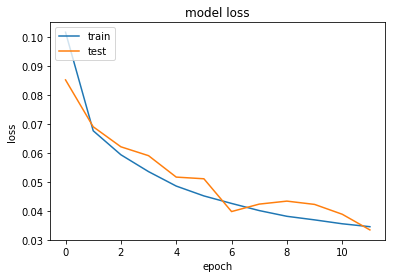

In [7]:
%matplotlib inline
# summarize history for accuracy
acc = history.history['acc']
print(len(acc))
val_acc = history.history['val_acc']
epochs = range(1, len(acc)+1)
print(len(acc))

plt.plot(epochs, acc, label='training acc')
plt.plot(epochs, val_acc, label='validation acc')
plt.title('model accuracy')
#plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()